In [6]:
import pandas
pandas.read_csv("/home/thiendc/projects/video_summarization/v2/data/colors_v2.csv", header = 0)

,color short,color name,color code,r,g,b,description,main_color
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168,Mostly desaturated dark blue,black
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143,Dark blue,black
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193,Slightly desaturated blue,blue
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56,Dark red,black
4,alice_blue,Alice Blue,#f0f8ff,240,248,255,Very pale (mostly white) blue,white
...,...,...,...,...,...,...,...,...
860,yellow_orange,Yellow Orange,#ffae42,255,174,66,Light orange,orange
861,yellow_process,Yellow (Process),#ffef00,255,239,0,Pure (or mostly pure) yellow,yellow
862,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51,Bright yellow,yellow
863,zaffre,Zaffre,#0014a8,0,20,168,Dark blue,black


In [3]:
from src.color_domain.dominant_color import DominantColorDetector
main_color_detector = DominantColorDetector(strategy = 'centric')
main_color_detector.get_color_main('data/sample.png')

'green'

In [ ]:
import

Dominant color (BGR): [87, 128, 108]


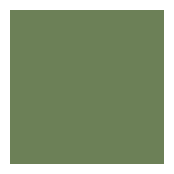

In [5]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def get_dominant_color(image, k=1):
    # Reshape the image to be a list of pixels
    pixels = image.reshape((-1, 3))

    # Convert to float for KMeans
    pixels = np.float32(pixels)

    # Perform K-means clustering to find the dominant color
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)

    # Get the dominant color
    dominant_color = kmeans.cluster_centers_[0]
    return dominant_color

# Load the image
image = cv2.imread('./data/sample.png')
height, width = image.shape[:2]
# Resize the image if it's too large (optional)
image = cv2.resize(image, (width // 10, height // 10), interpolation=cv2.INTER_AREA)

# Get the dominant color
dominant_color = get_dominant_color(image, k= 1)

# Convert the color to integers and display
dominant_color = [int(c) for c in dominant_color]
print("Dominant color (BGR):", dominant_color)

# Plot the color
plt.figure(figsize=(2, 2))
plt.imshow([[dominant_color[::-1]]])  # Convert BGR to RGB for displaying
plt.axis('off')
plt.show()


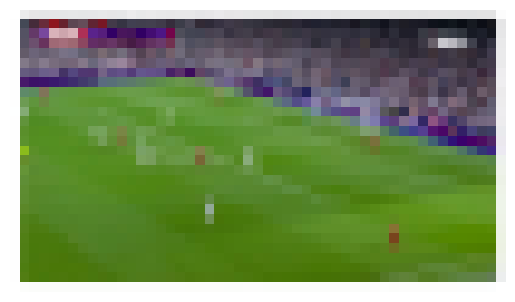

Dominant color (BGR): [77, 127, 103]


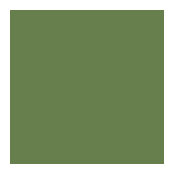

In [2]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def get_dominant_color(image, k=1):
    # Reshape the image to be a list of pixels
    pixels = image.reshape((-1, 3))

    # Convert to float for KMeans
    pixels = np.float32(pixels)

    # Perform K-means clustering to find the dominant color
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)

    # Get the dominant color
    dominant_color = kmeans.cluster_centers_[0]
    return dominant_color

# Load the image
image = cv2.imread('./data/sample.png')
height, width = image.shape[:2]

# Resize the image if it's too large (optional)
image = cv2.resize(image, (width // 10, height // 10), interpolation=cv2.INTER_AREA)

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Increase saturation by a factor (e.g., 1.2 for a slight boost)
saturation_increase_factor = 1.2
hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * saturation_increase_factor, 0, 255)

# Convert back to BGR color space
saturated_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

# Display the saturated image using matplotlib
plt.imshow(cv2.cvtColor(saturated_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.axis('off')
plt.show()

# Get the dominant color in the saturated image
dominant_color = get_dominant_color(saturated_image, k=1)

# Convert the color to integers and display
dominant_color = [int(c) for c in dominant_color]
print("Dominant color (BGR):", dominant_color)

# Plot the dominant color
plt.figure(figsize=(2, 2))
plt.imshow([[dominant_color[::-1]]])  # Convert BGR to RGB for displaying
plt.axis('off')
plt.show()


Dominant color (BGR): [33, 128, 84]


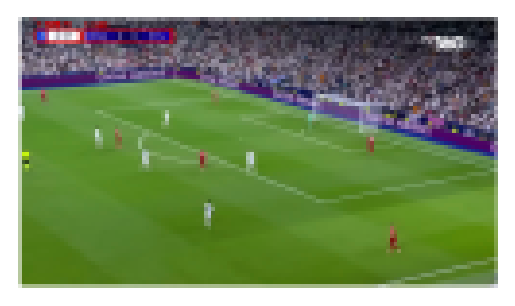

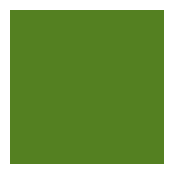

In [38]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter

def get_dominant_color_by_area(image, k=5):
    # Reshape the image to be a list of pixels
    pixels = image.reshape((-1, 3))

    # Convert to float for KMeans
    pixels = np.float32(pixels)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)

    # Count the number of pixels in each cluster
    counts = Counter(kmeans.labels_)

    # Find the largest cluster and get its color
    dominant_color = kmeans.cluster_centers_[counts.most_common(1)[0][0]]
    return dominant_color

# Load the image
image = cv2.imread('./data/sample.png')

# Resize the image slightly if needed (avoid resizing too small to maintain details)
height, width = image.shape[:2]
image = cv2.resize(image, (width // 4, height // 4), interpolation=cv2.INTER_AREA)

# Convert the image to HSV color space to increase saturation
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Increase saturation by a factor (optional)
saturation_increase_factor = 1.1
hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * saturation_increase_factor, 0, 255)

# Convert back to BGR color space
saturated_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

# Get the dominant color based on area with multiple clusters
dominant_color = get_dominant_color_by_area(saturated_image, k=5)

# Convert the color to integers and display
dominant_color = [int(c) for c in dominant_color]
print("Dominant color (BGR):", dominant_color)

# Display the saturated image
plt.imshow(cv2.cvtColor(saturated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Plot the dominant color
plt.figure(figsize=(2, 2))
plt.imshow([[dominant_color[::-1]]])  # Convert BGR to RGB for displaying
plt.axis('off')
plt.show()
